## HW03 Notebook

Complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code). Submit the following:
1. This notebook file and `hw3.py`, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.

__NOTE__: The purpose of this notebook is to demonstrate the functionality implemented in `hw3.py`. As part of this demo, all analysis (i.e., questions that prompt for a short answer) are to be added to the notebook. Keep the order of the problems as listed in the assignment description. Furthermore, cells are provided as placeholders for each response; however, cells can be added as needed.

Please report any questions to the [class Piazza page](https://piazza.com/class/lcwv1h9p2a11ai).

### Import required libraries.

In [782]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
from hw3 import calc_confusion_matrix_for_threshold
from hw3 import calc_percent_cancer
from hw3 import calc_binary_metrics
from hw3 import predict_0_always_classifier 
from hw3 import calc_accuracy
from hw3 import print_perf_metrics_for_threshold
from hw3 import calc_perf_metrics_for_threshold

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8') # pretty matplotlib plots

In [783]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### 1) Function to calculate TP, TN, FP, and FN.
The following four calls to the function `calc_binary_metrics` to test it. This way, the function can be tested for several edge cases. ***Don't modify this.***

In [784]:
all0 = np.zeros(10)
all1 = np.ones(10)
TP, TN, FP, FN = calc_binary_metrics(all0, all1)
print(f"0 vs 1\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

0 vs 1
TP: 0.0
TN: 0.0
FP: 10.0
FN: 0.0


In [785]:
TP, TN, FP, FN = calc_binary_metrics(all1, all0)
print(f"1 vs 0\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

1 vs 0
TP: 0.0
TN: 0.0
FP: 0.0
FN: 10.0


In [786]:
TP, TN, FP, FN = calc_binary_metrics(all1, all1)
print(f"1 vs 1\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

1 vs 1
TP: 10.0
TN: 0.0
FP: 0.0
FN: 0.0


In [787]:
TP, TN, FP, FN = calc_binary_metrics(all0, all0)
print(f"0 vs 0\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

0 vs 0
TP: 0.0
TN: 10.0
FP: 0.0
FN: 0.0


### Load the dataset.

The following should ***not*** be modified.

After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [788]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data/y_test.csv', delimiter=',', skiprows=1)

Inspect Data. The following should ***not*** be modified.

In [789]:
feat_names = np.loadtxt(f'data/x_train.csv', delimiter=',', dtype=str, max_rows=1)
print(f"features: {feat_names}\n")
target_name = np.loadtxt(f'data/x_test.csv', delimiter=',', dtype=str, max_rows=1)
df_sampled_data = pd.DataFrame(x_test, columns=feat_names)
df_sampled_data[str(target_name)] = y_test
df_sampled_data.sample(15)

features: ['age' 'famhistory' 'marker']



,age,famhistory,marker,['age' 'famhistory' 'marker']
81,67.11634,1.0,1.349243,0.0
117,68.24641,0.0,0.921616,0.0
162,53.74131,1.0,2.004676,0.0
23,63.12071,0.0,0.592084,0.0
41,58.86290,0.0,0.234737,0.0
114,60.32011,0.0,0.857177,0.0
56,57.48566,0.0,1.362557,0.0
159,64.84370,0.0,0.594441,0.0
100,71.86153,0.0,0.879809,0.0
169,64.29861,0.0,2.843979,0.0


### 2) Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [790]:
#DONE: modify these prints
tr_percent = calc_percent_cancer(y_train)
te_percent = calc_percent_cancer(y_test)

print("Percent of data that has_cancer on TRAIN: %.3f" % tr_percent)
print("Percent of data that has_cancer on TEST : %.3f" % te_percent)

Percent of data that has_cancer on TRAIN: 14.035
Percent of data that has_cancer on TEST : 13.889


### 3) The predict-0-always baseline

#### (i) Compute the accuracy of the always-0 classifier.

Complete the functions to compute and calculate the accuracy of the always-0 classifier on validation and test outputs.

In [791]:
#TODO: implement predict_0_always_classifer()
y_train_pred = predict_0_always_classifier(x_train)
y_test_pred = predict_0_always_classifier(x_test)

acc_train = calc_accuracy(*calc_binary_metrics(y_train, y_train_pred))
acc_test = calc_accuracy(*calc_binary_metrics(y_test, y_test_pred))

print("acc on TRAIN: %.3f" % (acc_train * 100)) #DONE: modify these values
print("acc on TEST : %.3f" % (acc_test * 100))

acc on TRAIN: 85.965
acc on TEST : 86.111


#### (ii) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [792]:
# DONE: call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, predict_0_always_classifier(y_test)))

Predicted    0  1
True             
0          155  0
1           25  0


#### (iii) Reflect on the accuracy of the always-0 classifier.

**Answer**:
Even though the always-0 classifier doesn't even look at the data, it is still relatively accurate as the amount of people without cancer far outweigh the amount of people that do. However, this also shows where accuracy can fail as a metric, as it doesn't do any detection at all. This basically says that most people don't have cancer. 

#### (iv) Analyze the various costs of using the always-0 classifier.

**Answer**: 
It literally doesn't do anything when predicting whether or not someone actually has cancer. It just assumes that people don't because most people don't have cancer. It has a 0 percent accuracy when catching positive cases, which are the more important cases to worry about. It is more important to know if someone actually does have cancer (aka false negatives are more dangerous). 

### 4: Basic Perceptron Models

#### (i) Normalize data

In [793]:
#TODO
from hw3 import standardize_data
scaledTrainX, scaledTestX = standardize_data(x_train, x_test)
print(scaledTrainX)
print(scaledTestX)

[[0.53637473 0.         0.10816263]
 [0.43257395 0.         0.05418465]
 [0.72202778 1.         0.18904397]
 ...
 [0.45372565 0.         0.57842732]
 [0.33260801 0.         0.1189701 ]
 [0.62875077 0.         0.03734379]]
[[4.52932628e-01 0.00000000e+00 1.29363870e-01]
 [6.41709616e-01 1.00000000e+00 4.42667981e-02]
 [4.53226277e-01 0.00000000e+00 2.18670957e-01]
 [6.27107844e-01 0.00000000e+00 3.88584749e-01]
 [5.35089577e-01 0.00000000e+00 6.34107532e-02]
 [4.89981992e-01 0.00000000e+00 1.98314102e-01]
 [1.31167277e-01 1.00000000e+00 6.26043500e-02]
 [8.40709760e-01 0.00000000e+00 8.75066995e-02]
 [4.03642870e-01 0.00000000e+00 2.29611761e-02]
 [6.70801737e-01 0.00000000e+00 1.42722202e-01]
 [5.12940567e-01 0.00000000e+00 2.27504536e-01]
 [7.13664592e-01 0.00000000e+00 5.40049381e-02]
 [3.95619178e-01 0.00000000e+00 7.35783742e-01]
 [7.63991116e-01 1.00000000e+00 8.87774053e-03]
 [6.66562110e-01 0.00000000e+00 4.70254745e-02]
 [6.34915071e-01 0.00000000e+00 8.54837609e-01]
 [5.093805

#### (ii) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [794]:
#TODO: train a basic perceptron model using default parameter values, and modify these accuracies below
from hw3 import perceptron_classifier
from sklearn.metrics import accuracy_score

trainPredict, testPredict = perceptron_classifier(scaledTrainX, y_train, scaledTestX, y_test)

print("acc on TRAIN: %.3f" % (accuracy_score(y_train, trainPredict) * 100))
print("acc on TEST : %.3f" % (accuracy_score(y_test, testPredict) * 100))


print("")
print("Confusion matrix for TEST:")
# TODO: call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, testPredict))

acc on TRAIN: 24.912
acc on TEST : 27.222

Confusion matrix for TEST:
Predicted   0    1
True              
0          24  131
1           0   25


#### (iii) Compare the `Perceptron` to the always-0 classifier.

**Answer**:  
The Perceptron did significantly worse than the always-0, as it way over estimated how many people had cancer. In other words, it picked up on a feature in the positive cases that did not generalize. This si seenas it always got things that were positive cased for the confusion matrix, but it would also get false positives. However, I would consider this better than the always-0 classifier even though the accuracy was lower as it was able to actually detect cancer, and this is a case that is better safe then sorry. 


#### (iv) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [795]:
train_accuracy_list = list()
test_accuracy_list = list()

from hw3 import series_of_preceptrons

# TODO: create, fit models here and record accuracy of each (Implement functions needed)
alphas = np.logspace(-5, 5, base=10, num=100)
train_accuracy_list, test_accuracy_list = series_of_preceptrons(scaledTrainX, y_train, scaledTestX, y_test, alphas)
print("Alphas:", alphas)
print("Train Accuracy:", train_accuracy_list)
print("Test Accuracy:", test_accuracy_list)

Alphas: [1.00000000e-05 1.26185688e-05 1.59228279e-05 2.00923300e-05
 2.53536449e-05 3.19926714e-05 4.03701726e-05 5.09413801e-05
 6.42807312e-05 8.11130831e-05 1.02353102e-04 1.29154967e-04
 1.62975083e-04 2.05651231e-04 2.59502421e-04 3.27454916e-04
 4.13201240e-04 5.21400829e-04 6.57933225e-04 8.30217568e-04
 1.04761575e-03 1.32194115e-03 1.66810054e-03 2.10490414e-03
 2.65608778e-03 3.35160265e-03 4.22924287e-03 5.33669923e-03
 6.73415066e-03 8.49753436e-03 1.07226722e-02 1.35304777e-02
 1.70735265e-02 2.15443469e-02 2.71858824e-02 3.43046929e-02
 4.32876128e-02 5.46227722e-02 6.89261210e-02 8.69749003e-02
 1.09749877e-01 1.38488637e-01 1.74752840e-01 2.20513074e-01
 2.78255940e-01 3.51119173e-01 4.43062146e-01 5.59081018e-01
 7.05480231e-01 8.90215085e-01 1.12332403e+00 1.41747416e+00
 1.78864953e+00 2.25701972e+00 2.84803587e+00 3.59381366e+00
 4.53487851e+00 5.72236766e+00 7.22080902e+00 9.11162756e+00
 1.14975700e+01 1.45082878e+01 1.83073828e+01 2.31012970e+01
 2.91505306e+01 

##### Plot accuracy on train/test data across the different alpha values plotted on a logarithmic scale. Make sure to show title, legends, and axis labels.

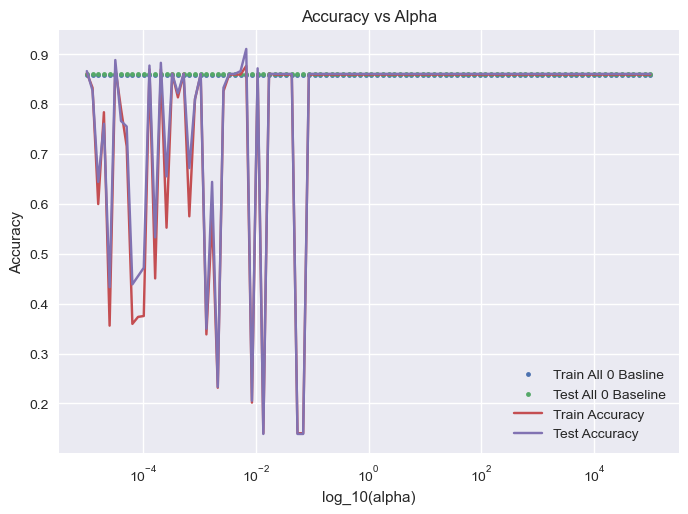

In [796]:
# TODO make plot
plt.xlabel('log_10(alpha)');
plt.ylabel('Accuracy');
plt.xscale("log")

allZeroTrain, allZeroTest = [acc_train] * len(alphas) , [acc_test] * len(alphas)
plt.plot(alphas, allZeroTrain, '.', label = "Train All 0 Basline")
plt.plot(alphas, allZeroTest, '.', label = "Test All 0 Baseline")

plt.plot(alphas, train_accuracy_list, label = "Train Accuracy")
plt.plot(alphas, test_accuracy_list, label = "Test Accuracy")
plt.title("Accuracy vs Alpha")


# TODO add legend, titles, etc. set x-scale appropriately
# plt.legend(...);
plt.legend()

#### (iv) Discuss what the plot is showing you.

**Answer**: 
The plot is show that as the alphas get closer to 1, it gets less accurate, then after passing 1, it is around ~80% accurate (which is no more accurate than just guessing all 0s). Note that the accuracy is not stable, as sometimes it jumps up to being as accurate as guessing all zeros. There are some points where alpha is low that it spikes up, but for the most part, it is either as good as guessing all zeros, or worse. 

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves.

In [797]:
# TODO: fit a Perceptron and generate its decision_function() over the test data.

# TODO: Build a CalibratedClassifierCV, using a Perceptron as its base_estimator,
#       and generate its probabilistic predictions over the test data.
from hw3 import calibrated_perceptron_classifier
predictTest, calibratedTest = calibrated_perceptron_classifier(scaledTrainX, y_train, scaledTestX, y_test)
print(y_test.shape, predictTest.shape, calibratedTest.shape)
print(predictTest)
print(calibratedTest)

(180,) (180,) (180,)
[ 0.34330422  2.05724554  0.78159876  2.65288979  0.51266198  0.90209
 -0.90890292  2.45969294 -0.4718141   1.71262687  1.18218962  1.53552292
  2.96446907  2.61616192  1.21948136  4.97868329  2.22921825 -0.00532034
  0.58521209 -0.38679493  0.31569996 -0.00998302  0.1748038   0.52465219
  0.40617655 -0.55135807  3.07875626  1.11902417  1.60647497  0.84169265
  1.64556271  1.48911934  3.38064946  2.11131123 -0.44608174  1.4481928
  0.29905348  0.22714608  1.9616238   0.45954594  1.99322186 -0.47472218
  2.30744181 -0.17513359  0.94929703  2.10404007  1.78557084  0.29701235
 -0.01309613  2.95362757  0.90547034  1.84010952  0.09325945  3.03396326
  0.91922085  3.12175036  0.1063455   2.6411796   0.42950566  2.03248137
  2.32087924 -0.16287147  1.90895723  0.65336426  3.64414115  0.62439821
  5.26426379 -0.15709484  1.08030205 -0.13084028  3.54974293  1.84569602
  0.1167338   2.00633315  1.67337408  0.34430957  1.46129318  1.86190633
  1.61929606  1.64325517  0.659927

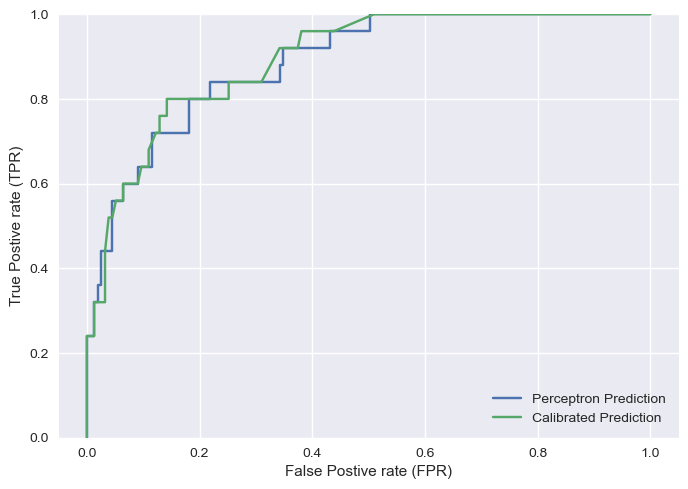

In [798]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)

predictFpr, predictTpr, predictThr = sklearn.metrics.roc_curve(y_test, predictTest)
calibratedFpr, calibratedTpr, calibratedThr = sklearn.metrics.roc_curve(y_test, calibratedTest)
plt.plot(predictFpr, predictTpr, label = "Perceptron Prediction")
plt.plot(calibratedFpr, calibratedTpr, label = "Calibrated Prediction")

plt.ylim([0, 1]);
plt.legend(loc='lower right')
plt.xlabel("False Postive rate (FPR)");
plt.ylabel("True Postive rate (TPR)");


In [799]:
print("AUC on TEST for Perceptron: %.3f" % sklearn.metrics.roc_auc_score(y_test, predictTest)) #TODO: modify these values
print("AUC on TEST for probabilistic model: %.3f" % sklearn.metrics.roc_auc_score(y_test, calibratedTest))

AUC on TEST for Perceptron: 0.887
AUC on TEST for probabilistic model: 0.894


#### (b) Discuss the results above

**Answer**: 
The model did better than just flipping a random coin for the positive outcomes. Since the ROC curve is closer to vertical for the most part, that means it does a decent job at predicting positive outcomes. The curves are very similar, but the probabilisitic model does slightly better when looking at the area under the curve (as a higher area is better). In the future I would probably use a probabilisitc model, as the output is easier to understand than that of a confidence model, as the probability can be read off as a percent confidence, whereas the confidence is not constrained to the range [0, 1].

#### (c) Compute model metrics for different probabilistic thresholds

Complete `calc_perf_metrics_for_threshold` that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true positive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [800]:
# TODO: test different thresholds to compute these values
from hw3 import find_best_thresholds
best_TPR = 0
best_PPV_for_best_TPR = 0
best_TPR_threshold = 0

best_PPV = 0
best_TPR_for_best_PPV = 0
best_PPV_threshold = 0

best_TPR, best_PPV_for_best_TPR, best_TPR_threshold, best_PPV, best_TPR_for_best_PPV, best_PPV_threshold = find_best_thresholds(y_test, calibratedTest)
print("Best TPR:", best_TPR)
print("Corresponding PPV:", best_PPV_for_best_TPR)
print("Threshold:", best_TPR_threshold)
print()
print("Best PPV:", best_PPV)
print("Best Corresponding TPR:", best_TPR_for_best_PPV)
print("Threshold:", best_PPV_threshold)

Best TPR: 1.0
Corresponding PPV: 0.22935779816513763
Threshold: 0.04003999999999999

Best PPV: 1.0
Best Corresponding TPR: 0.24
Threshold: 0.6406399999999999


In [801]:
print("Best TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("Best PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

Best TPR threshold: 0.0400 => TPR: 1.0000; PPV: 0.2294
Best PPV threshold: 0.6406 => PPV: 1.0000; TPR: 0.2400


#### (e) Exploring different thresholds

#### (i) Using default 0.5 threshold.

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [802]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, calibratedTest, thresh = best_thr))
print("")
# TODO: print_perf_metrics_for_threshold(...)
print_perf_metrics_for_threshold(y_test, calibratedTest, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.5000

Predicted    0   1
True              
0          150   5
1           15  10

0.889 ACC
0.400 TPR
0.968 TNR
0.667 PPV
0.909 NPV


#### (ii) Using threshold with highest TPR.

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [803]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, calibratedTest, thresh = best_thr))
print("")
# TODO: print_perf_metrics_for_threshold(...)
print_perf_metrics_for_threshold(y_test, calibratedTest, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.0400

Predicted   0   1
True             
0          71  84
1           0  25

0.533 ACC
1.000 TPR
0.458 TNR
0.229 PPV
1.000 NPV


#### (iii) Using threshold with highest PPV.

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [804]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, calibratedTest, thresh = best_thr))
print("")
# TODO: print_perf_metrics_for_threshold(...)
print_perf_metrics_for_threshold(y_test, calibratedTest, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.6406

Predicted    0  1
True             
0          155  0
1           19  6

0.894 ACC
0.240 TPR
1.000 TNR
1.000 PPV
0.891 NPV


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: 
(a) has the highest accuracy of all of the values, as it it able to guess about there not being any cancer, although actually detecting cancer is still close to 50-50, with it being on the less accurate side. However, that is better than the other thresholds, as (b) just says that they have cancer to everything (aka it is just an always-1 model), so it is not actually very useful in detection. (c) underdetects, as even though it gets all of the negative cases, it also thinks that some cancer is just negative. 

These scores probably occur because of what they are based off of. (a) is arbitrarily chosen in the middle, so it will generally get an even spread, whereas (b) and (c) both focus on the true positive. In (b)'s case it focuses only on getting the positive cases right, while not caring at all for the negative cases (because FP is never in the formula when deciding the best TPR). This leads it to always saying it is positive, because there is no counterbalancing factor. On the other hand, (b) focuses on getting the ratio of positives correct. This means that it is way more careful in assigning positives. However, since it only cares about what was assigned positive, it does not account for any positives that (b) misses. This means that it would rather give a false negative than actually guess the correct value. This means that the function would probably approach the all-0 predictor. 

Notice that (a) does a good job because the threshold happened to be chosen in the range of the thresholds between the threshold of (b) and (c), which makes sense as it is trying to find something in between the all-0 and all-1, which will probably have a better well rounded approach. It would be best in the future to also account for the assigned negatives and how accurate those are. 